# Assignment 2: Face recognition using LBP/PCA/LDA

In this assignment, you will test/implement and report about a face recognition algorithm based on Principal Components Analysis (Eigenfaces), Linear Discriminant Analysis (Fisherfaces) and Local Binary Pattern (LBP). These procedures are representative of _old-school_ computer vision techniques that are still in use and retain their merits. All three generate feature vector descriptors that can be compared for verification/identifaction.

You will have to evaluate its recognition performance on:
* three different representations (PCA/LDA/LBP)
* three (gradually more complex) databases of still images.

Discuss the results w.r.t. data and method

**Note: large parts of this notebook are based on the [PyImageSearch Gurus Course on Computer Vision](https://www.pyimagesearch.com/pyimagesearch-gurus/) by Adrian Rosebrock.**

## Eigenfaces for face recognition

In 1971 Goldstein et al. ([Identification of human faces](http://ieeexplore.ieee.org/xpl/login.jsp?tp=&arnumber=1450184&url=http%3A%2F%2Fieeexplore.ieee.org%2Fxpls%2Fabs_all.jsp%3Farnumber%3D1450184)) demonstrated that facial characteristics can be manually extracted, quantified and used for face recognition. The question then remained: could this be done in an automatic fashion? 

It wasn’t until the 1987 paper by Kirby and Sirovich ([A Low-Dimensional Procedure for the Characterization of Human Faces](https://gurus.pyimagesearch.com/wp-content/uploads/2015/10/kirby_1987.pdf)) that we were able to answer this question. This paper is considered to be a seminal work in the history of computer vision — and while other approaches have since been proposed that can outperform Eigenfaces, it’s still important that we take the time to understand and appreciate this algorithm. [Turk and Pentland](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&cad=rja&uact=8&ved=2ahUKEwjmvqy6jqfhAhWFZFAKHb74DNgQFjAAegQIABAC&url=http%3A%2F%2Fwww.face-rec.org%2Falgorithms%2Fpca%2Fjcn.pdf&usg=AOvVaw2IlxVps8dldmeA01yQDa_I) built on this idea in the context of face recognition. 

The Eigenfaces algorithm uses Principal Component Analysis to construct a low-dimensional representation of face images.

![An example of applying an eigenvalue decomposition to a dataset of faces and extracting the 16 "eigenfaces" with the largest corresponding eigenvalue magnitude.](notebook_images/what_is_fr_eigenfaces.jpg)


This involves collecting a dataset of faces with multiple face images per person we want to identify — like having multiple training examples of an image class we would want to label in image classification. Given this dataset of face images (presumed to be the same width, height, and ideally — with their eyes and facial structures aligned at the same (x, y)-coordinates, we apply an eigenvalue decomposition of the dataset, keeping the eigenvectors with the largest corresponding eigenvalues.

Given these eigenvectors, a face can then be represented as a linear combination of what Kirby and Sirovich call eigenfaces.

Face identification can be performed by computing the Euclidean distance between the eigenface representations and treating the face identification as a k-Nearest Neighbor classification problem — however, we tend to commonly apply more advanced machine learning algorithms to the eigenface representations.

Last, it’s important to note that the Eigenfaces algorithm is **not-specific to faces** — we can actually apply it to any arbitrary dataset containing objects of the same type that need to be compared, whether that may be bicycles, cans of soup, or ancient Aztec coins. The Eigenfaces algorithm can be modified to accommodate each of these identification tasks.

## Fisherfaces for face recognition

From [Scholarpaedia](http://www.scholarpedia.org/article/Fisherfaces):
> When the goal is classification rather than representation, PCA may not yield the most desirable results. In such cases, one wishes to find a subspace that maps the sample vectors of the same class in a single spot of the feature representation and those of different classes as far apart from each other as possible. The techniques derived to achieve this goal are known as discriminant analysis (DA).
The most known DA is [Linear Discriminant Analysis (LDA)](http://www.scholarpedia.org/article/Linear_Discriminant_Analysis), which can be derived from an idea suggested by R.A. Fisher in 1936. When LDA is used to find the subspace representation of a set of face images, the resulting basis vectors defining that space are known as [Fisherfaces](http://www.scholarpedia.org/article/Fisherfaces).

![Example of FisherFaces](notebook_images/FisherFaces.jpg)

## LBP for face recognition

Local Binary Patterns, or LBPs for short, are a texture descriptor made popular by the work of Ojala et al. in their 2002 paper, [Multiresolution Grayscale and Rotation Invariant Texture Classification with Local Binary Patterns](http://www.outex.oulu.fi/publications/pami_02_opm.pdf) (although the concept of LBPs were introduced as early as 1993).

Unlike [Haralick texture features](http://haralick.org/journals/TexturalFeatures.pdf) that compute a global representation of texture based on the [Gray Level Co-occurrence Matrix](https://en.wikipedia.org/wiki/Co-occurrence_matrix), LBPs instead compute a local representation of texture. This local representation is constructed by comparing each pixel with its surrounding neighborhood of pixels. See [PyImageSearch](https://www.pyimagesearch.com/2015/12/07/local-binary-patterns-with-python-opencv/) and [Scikit-Image](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_local_binary_pattern.html) for further details on LBP.
![LBP](notebook_images/LBP.png)

## Face Datasets

[From OpenCV Docs](https://docs.opencv.org/3.4/da/d60/tutorial_face_main.html):

In order to test face recognition systems, we need databases of labeled face images. You can either create your own dataset (but that takes time) or, better, start with one of the available face databases, http://face-rec.org/databases/ gives you an up-to-date overview. Some interesting databases are:

* [AT&T Facedatabase](http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html). Quoted from http://face-rec.org):
> The AT&T Facedatabase, sometimes also referred to as ORL (Olivetti Research Lab) Database of Faces or Olivetti faces, contains ten different images of each of 40 distinct subjects. For some subjects, the images were taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement).The AT&T Facedatabase is good for initial tests, but it's a fairly easy database. The Eigenfaces method already has a 97% recognition rate on it, so you won't see any great improvements with other algorithms.

This database can be accessed in a straightforward way through the [sklearn.datasets.fetch_olivetti_faces](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html#sklearn.datasets.fetch_olivetti_faces) module. 
A preview of this database can be seen [here](https://www.cl.cam.ac.uk/research/dtg/attarchive/facesataglance.html) 

* [The CALTECH Faces dataset](http://www.vision.caltech.edu/html-files/archive.html) is a popular benchmark dataset for face recognition algorithms. Overall, the dataset consists of 450 images of approximately 27 unique people. Each subject was captured under various lighting conditions, background scenes, and facial expressions. Furthermore, bounding box coordinates are provided to crop the faces prior to recognition. A routine (load_caltech_faces)is provided to read the data. 

![A sample of the CALTECH Faces dataset.](notebook_images/lbps_fr_caltech_faches.jpg)

* [The Labeled Faces in the Wild (lfw)](http://vis-www.cs.umass.edu/lfw/). This dataset is a collection of more than 13000 JPEG pictures of famous people collected over the internet. Each face has been labeled with the name of the person pictured. 1680 of the people pictured have two or more distinct photos in the data set. These images are completely unconstrained (pose, illumination, expression, occlusion).  The only constraint on these faces is that they were detected by the Viola-Jones face detector. Each picture is centered on a single face. A loader [sklearn.datasets.fetch_lfw_people](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html#sklearn.datasets.fetch_lfw_people) is provided by scikit-learn. 

## TEST

Below you find a skeleton of code blocks that can assist you in analyzing the performance of the different embedding representations on the different datasets

#### Import the required Python packages

In [1]:
# local packages
from localmodules.datasets import load_faces
from localmodules.distance import L2_distance, KLD, CHI2, show_pair
from localmodules.local_binary_patterns import LBP

# sklearn packagees
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

# varia
import numpy as np
import cv2
from pathlib import Path

import matplotlib.pyplot as plt
%matplotlib inline

# the following package contains some handy routines for image manipulation
# they have been developed by Adrian Rosenbrock
# simply install this package in your environment using "conda install imutils"
# see https://www.pyimagesearch.com/opencv-tutorials-resources-guides/ for further info
import imutils

#### input parameters in offline mode

In [ ]:
#py>
#import argparse
# 
## construct the argument parse and parse command line arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-d", "--dataset", required=True, help="path to CALTECH Faces dataset")
#ap.add_argument("-n", "--num-components", type=int, default=150, help="# of principal components")
#ap.add_argument("-f", "--facesDB", default="ATT", help="type of Face database (ATT/LFW/CALTECH)")
#ap.add_argument("-desc", "--descriptor", default="PCA", help="type of descriptor (PCA/LDA/LBP)")
#args = vars(ap.parse_args())
#caltechDataset = args["dataset"]
#num_components = args["num-components"]
#facesDB = args["facesDB"]
#DESC = args["descriptor"]

#### input parameters in online mode

In [2]:
#nb>
# input parameters

# path to dataset for Caltech data
# point to correct directory
caltechDataset = Path("./CalTechFacesDirs")
# number of PCA/LDA components to retain

num_components = 35
# type of database (ATT/LFW/CALTECH)
facesDB = "CALTECH"
# type of descriptor (PCA/LDA/LBP)
DESC = "LBP"
# max number of persons to extract from database
max_persons = 50

#### Import face image data sets (Olivetti (AT&T), Labeled Faces in the Wild, Caltech)

The data are returned as a list object with the following components:
* data: (NxM) matrix of N flattened (linear dimension M) images
* images: (Nx(nxm)) matrix of N images of dimension nxm 
* target: N-dimensional vector of labels 

In [3]:
# Download the data, if not already on disk and load it as numpy arrays

faces_att = load_faces("ATT", dataset = None, min_faces=10, max_targets=max_persons)
 
faces_lfw = load_faces("LFW", dataset = None, min_faces=10, max_targets=max_persons)

faces_cal = load_faces("CALTECH", dataset = caltechDataset, min_faces=10, max_targets=max_persons)


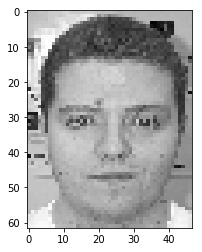

In [4]:

plt.imshow(faces_cal.images[10], cmap='gray')
plt.show()

#### print statistics of data

In [5]:
def print_stat(faces):
    n_samples, h, w = faces.images.shape

    # for machine learning we use the flattened data
    X = faces.data
    n_features = X.shape[1]

    # the label to predict is the id of the person
    y = faces.target
    # encode the labels to integers
    le = LabelEncoder()
    y = le.fit_transform(y)
    n_classes = np.unique(y).shape[0]

    print("Total dataset size:")
    print("n_samples: %d" % n_samples)
    print("n_features: %d" % n_features)
    print("n_classes: %d" % n_classes)
    print("height: %d, width: %d" % (h,w))
    return X, y, n_samples, n_features, n_classes

In [6]:
X_att, y_att, n_samples_att, n_features_att, n_classes_att = print_stat(faces_att)
X_lfw, y_lfw, n_samples_lfw, n_features_lfw, n_classes_lfw = print_stat(faces_lfw)
X_cal, y_cal, n_samples_cal, n_features_cal, n_classes_cal = print_stat(faces_cal)

Total dataset size:
n_samples: 260
n_features: 4096
n_classes: 26
height: 64, width: 64
Total dataset size:
n_samples: 1063
n_features: 1850
n_classes: 44
height: 50, width: 37
Total dataset size:
n_samples: 320
n_features: 2914
n_classes: 17
height: 62, width: 47


#### Select PCA/LDA/LBP descriptor and calculate descriptor

In [7]:
# select the feature embedding mehtod (PCA, LDA, LBP)
# return the vector-coded embedding of the images
def compute_desc(num_comp, n_samples, n_features, X, y, DESC, faces):
    if DESC == "PCA":
        # Compute a PCA (eigenfaces) on the face dataset
        num_comp = min(num_components, min(n_samples, n_features))
        # print("num_components {n}".format(n=num_components))
        desc = PCA(n_components=num_comp, svd_solver='randomized', whiten=True).fit(X)
        X_pca = desc.transform(X)
        embedded = X_pca


    elif DESC == "LDA":
        num_comp = min(num_components, min(n_samples, n_features))
        desc = LinearDiscriminantAnalysis(n_components=num_comp).fit(X, y)
        X_lda = desc.fit_transform(X,y)
        embedded = X_lda

    elif DESC == "LBP":
        desc = LBP(numPoints=8, radius=1, grid_x=7, grid_y=7)
        embedded = desc.describe_list(faces.images)
    return embedded
    


In [8]:
embedded_att_PCA = compute_desc(num_components, n_samples_att, n_features_att, X_att, y_att, "PCA", faces_att)
embedded_lfw_PCA = compute_desc(num_components, n_samples_lfw, n_features_lfw, X_lfw, y_lfw, "PCA", faces_lfw)
embedded_cal_PCA = compute_desc(num_components, n_samples_cal, n_features_cal, X_cal, y_cal, "PCA", faces_cal)

embedded_att_LDA = compute_desc(num_components, n_samples_att, n_features_att, X_att, y_att, "LDA", faces_att)
embedded_lfw_LDA = compute_desc(num_components, n_samples_lfw, n_features_lfw, X_lfw, y_lfw, "LDA", faces_lfw)
embedded_cal_LDA = compute_desc(num_components, n_samples_cal, n_features_cal, X_cal, y_cal, "LDA", faces_cal)

embedded_att_LBP = compute_desc(num_components, n_samples_att, n_features_att, X_att, y_att, "LBP", faces_att)
embedded_lfw_LBP = compute_desc(num_components, n_samples_lfw, n_features_lfw, X_lfw, y_lfw, "LBP", faces_lfw)
embedded_cal_LBP = compute_desc(num_components, n_samples_cal, n_features_cal, X_cal, y_cal, "LBP", faces_cal)


c:\users\glavi\python37\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\glavi\python37\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\glavi\python37\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\glavi\python37\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\glavi\python37\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\glavi\python37\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


#### computer pair-wise matching scores

In [9]:
def comp_pairwise(embedded, n_samples, DESC, y):
    distances = [] # distance between pairs
    identical = [] # 1 if same identity, 0 otherwise
    # num = n_samples
    I = np.zeros((n_samples, n_samples))

    for i in range(n_samples-1):
        for j in range(1, n_samples):
            if DESC == "LBP":
                # Kullback-Leibler Divergence for normalized histograms
    #             distances.append(KLD(embedded[i], embedded[j]))
                # Better even: Chi-square distance
                distances.append(CHI2(embedded[i], embedded[j]))
            else:
                # Euclidean norm as distance
                distances.append(L2_distance(embedded[i], embedded[j]))
            if y[i] == y[j]:
                identical.append(1)
                I[i,j] =  I[j,i] = 1
            else:
                identical.append(0)

    distances = np.array(distances)
    # convert to normalized [0,1] score (the higher the better) swap?
    scores = (distances.max() - distances)/distances.max()
    identical = np.array(identical)
#     print(len(scores))
#     print(distances)
#     print(identical)
    return scores, distances, identical, I


In [10]:
scores_att_PCA, distances_att_PCA, identical_att_PCA, I_att_PCA = \
    comp_pairwise(embedded_att_PCA, n_samples_att, 'PCA', y_att)
scores_att_LDA, distances_att_LDA, identical_att_LDA, I_att_LDA = \
    comp_pairwise(embedded_att_LDA, n_samples_att, 'LDA', y_att)
scores_att_LBP, distances_att_LBP, identical_att_LBP, I_att_LBP = \
    comp_pairwise(embedded_att_LBP, n_samples_att, 'LBP', y_att)

scores_lfw_PCA, distances_lfw_PCA, identical_lfw_PCA, I_lfw_PCA = \
    comp_pairwise(embedded_lfw_PCA, n_samples_lfw, 'PCA', y_lfw)
scores_lfw_LDA, distances_lfw_LDA, identical_lfw_LDA, I_lfw_LDA = \
    comp_pairwise(embedded_lfw_LDA, n_samples_lfw, 'LDA', y_lfw)
scores_lfw_LBP, distances_lfw_LBP, identical_lfw_LBP, I_lfw_LBP = \
    comp_pairwise(embedded_lfw_LBP, n_samples_lfw, 'LBP', y_lfw)

scores_cal_PCA, distances_cal_PCA, identical_cal_PCA, I_cal_PCA = \
    comp_pairwise(embedded_cal_PCA, n_samples_cal, 'PCA', y_cal)
scores_cal_LDA, distances_cal_LDA, identical_cal_LDA, I_cal_LDA = \
    comp_pairwise(embedded_cal_LDA, n_samples_cal, 'LDA', y_cal)
scores_cal_LBP, distances_cal_LBP, identical_cal_LBP, I_cal_LBP = \
    comp_pairwise(embedded_cal_LBP, n_samples_cal, 'LBP', y_cal)

#### Generate a genuine and impostor pair and display score
In this implementation only the L2-distance is displayed

In [11]:
def display_pair(faces, embedded, I):
    genuine = np.asarray(np.where(I == 1)).T
    genuine_pair_id = np.random.randint(genuine.shape[0])

    impostor = np.asarray(np.where(I == 0)).T
    impostor_pair_id = np.random.randint(impostor.shape[0])


    show_pair(faces, embedded, genuine[genuine_pair_id][0], genuine[genuine_pair_id][1])
    show_pair(faces, embedded, impostor[impostor_pair_id][0], impostor[impostor_pair_id][1])

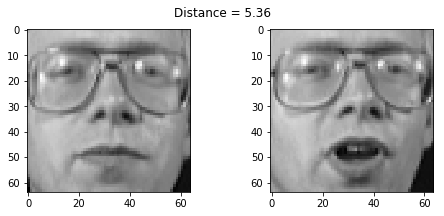

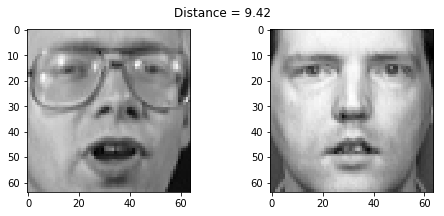

In [11]:
display_pair(faces_att, embedded_att_PCA, I_att_PCA)

#### compute F1 and accuracy scores for variable (and optimal) thresholds

* Calculate and plot F1 and accuracy scores for a range (min, max) of thresholds.
* Determine some optimal threshold (look up in classification literature)

In [16]:
from sklearn.metrics import f1_score, accuracy_score
def show_metrics(scores, identical, show, title):
    # set threshold range
    thresholds =  np.arange(0,1,0.03)

    f1_scores = []
    acc_scores = []
    for th in thresholds:
        scores_th = np.where(scores > th, 1, 0)
        f1_scores.append(f1_score(identical, scores_th))
        acc_scores.append(accuracy_score(identical, scores_th))


    # Determine optimal Threshold 
    # ...
    opt_tau = thresholds[np.argmax(f1_scores)]
    # ...
    print(opt_tau)

    # Plot F1 score and accuracy as function of distance threshold
    if show:
        plt.scatter(thresholds, f1_scores, c='b', label='F1 scores')
        plt.scatter(thresholds, acc_scores, c='r', label='accuracy scores')
        plt.legend()
        plt.xlabel('threshold')
        plt.xlabel('score')
        plt.title(title)
        plt.show()
    return opt_tau

0.6


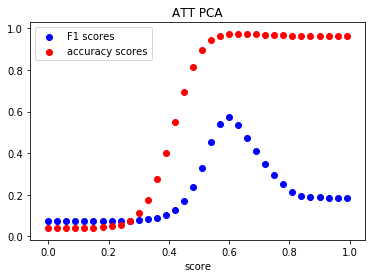

0.72


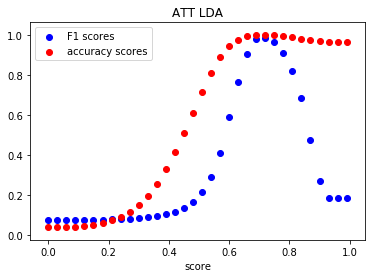

0.72


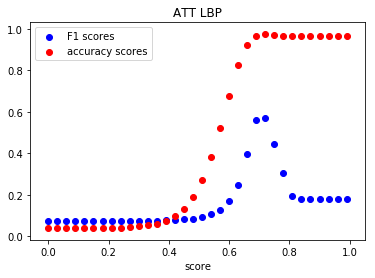

0.63


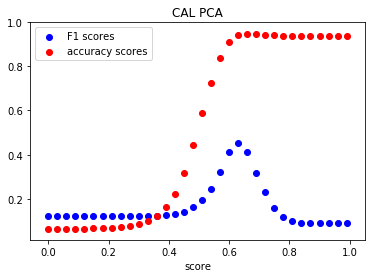

0.69


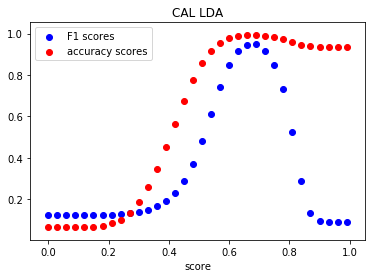

0.57


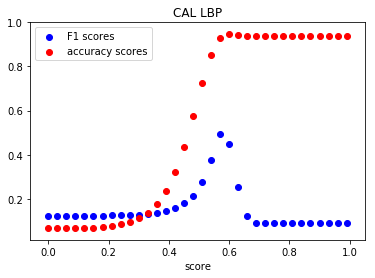

0.6599999999999999


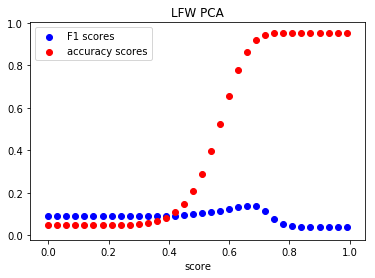

0.72


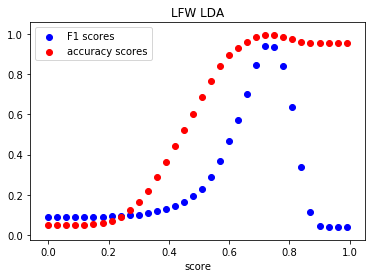

0.54


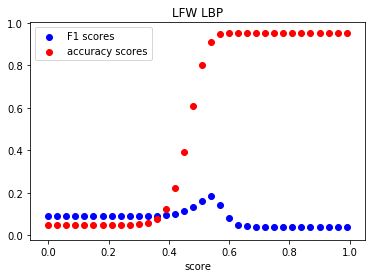

In [36]:
opt_tau_att_PCA = show_metrics(scores_att_PCA, identical_att_PCA, show=True, title='ATT PCA')
opt_tau_att_LDA = show_metrics(scores_att_LDA, identical_att_LDA, show=True, title='ATT LDA')
opt_tau_att_LBP = show_metrics(scores_att_LBP, identical_att_LBP, show=True, title='ATT LBP')

opt_tau_cal_PCA = show_metrics(scores_cal_PCA, identical_cal_PCA, show=True, title='CAL PCA')
opt_tau_cal_LDA = show_metrics(scores_cal_LDA, identical_cal_LDA, show=True, title='CAL LDA')
opt_tau_cal_LBP = show_metrics(scores_cal_LBP, identical_cal_LBP, show=True, title='CAL LBP')

opt_tau_lfw_PCA = show_metrics(scores_lfw_PCA, identical_lfw_PCA, show=True, title='LFW PCA')
opt_tau_lfw_LDA = show_metrics(scores_lfw_LDA, identical_lfw_LDA, show=True, title='LFW LDA')
opt_tau_lfw_LBP = show_metrics(scores_lfw_LBP, identical_lfw_LBP, show=True, title='LFW LBP')

#### plot genuine and impostor scores

In [78]:
def show_genuine_impostor(scores, identical, opt_tau, name):
    gen = scores[np.where(identical==1)]
    imp = scores[np.where(identical==0)]
    plt.hist(gen, density=False, bins=50, label='genuine')
    plt.hist(imp, density=False, alpha=0.5, bins=50, label='impostor')
    plt.legend()
    plt.xlabel('score')
    plt.ylabel('number')
    plt.axvline(x=opt_tau, color='r', linestyle='--')
    plt.title(name)
    plt.show()


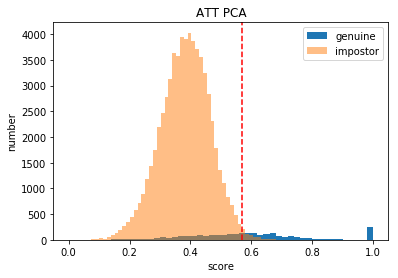

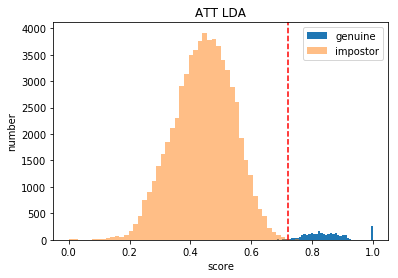

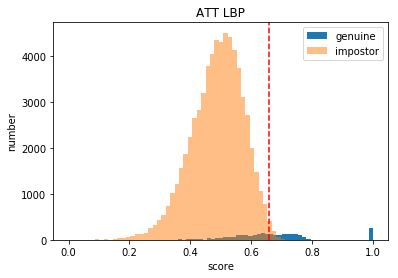

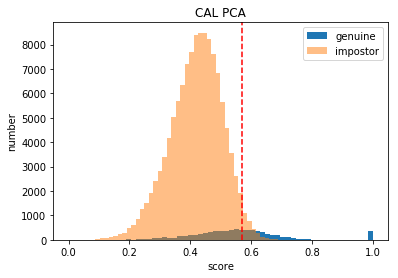

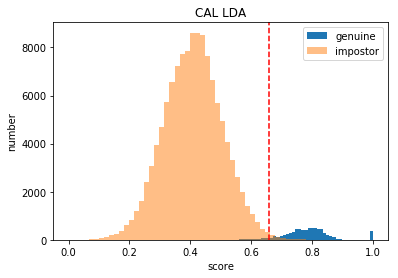

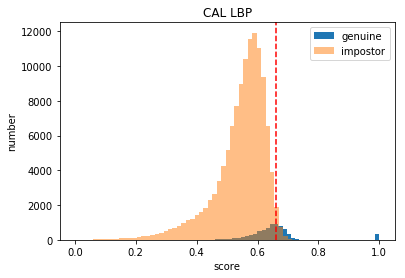

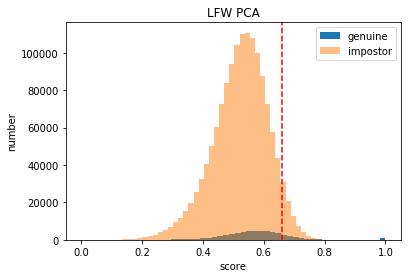

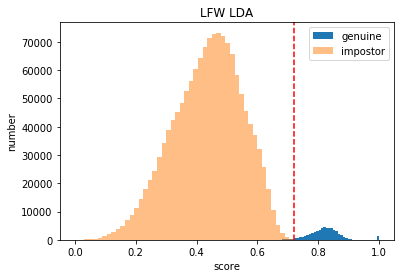

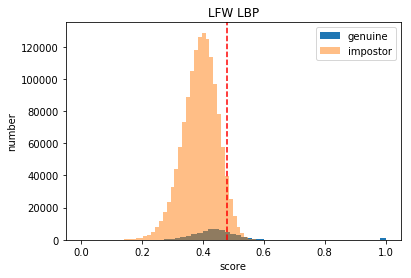

In [79]:
show_genuine_impostor(scores_att_PCA, identical_att_PCA, opt_tau_att_PCA, 'ATT PCA')
show_genuine_impostor(scores_att_LDA, identical_att_LDA, opt_tau_att_LDA, 'ATT LDA')
show_genuine_impostor(scores_att_LBP, identical_att_LBP, opt_tau_att_LBP, 'ATT LBP')

show_genuine_impostor(scores_cal_PCA, identical_cal_PCA, opt_tau_cal_PCA, 'CAL PCA')
show_genuine_impostor(scores_cal_LDA, identical_cal_LDA, opt_tau_cal_LDA, 'CAL LDA')
show_genuine_impostor(scores_cal_LBP, identical_cal_LBP, opt_tau_cal_LBP, 'CAL LBP')

show_genuine_impostor(scores_lfw_PCA, identical_lfw_PCA, opt_tau_lfw_PCA, 'LFW PCA')
show_genuine_impostor(scores_lfw_LDA, identical_lfw_LDA, opt_tau_lfw_LDA, 'LFW LDA')
show_genuine_impostor(scores_lfw_LBP, identical_lfw_LBP, opt_tau_lfw_LBP, 'LFW LBP')

#### Calculate Equal Error Rate

In [19]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from scipy.optimize import brentq
from scipy.interpolate import interp1d

def show_roc(scores_arr, identical_arr, names):
    EER_arr = []
    plt.title('Receiver Operating Characteristic')
    
    plt.plot([0, 1], [1, 0],'r--')
    plt.plot([0, 1], [0, 1],'k-')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    colors = ['b','g','r']
    for i in range(len(scores_arr)):
        fpr, tpr, threshold = roc_curve(identical_arr[i], scores_arr[i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, colors[i], linewidth=8, label = '%s AUC = %0.3f' % (names[i],roc_auc))
        fnr = 1 - tpr

        eer_threshold = threshold[np.nanargmin(np.absolute((fnr - fpr)))]
        EER = fpr[np.nanargmin(np.absolute((fnr - fpr)))]
        EER2 = fnr[np.nanargmin(np.absolute((fnr - fpr)))]
        print("%s Equal error rate: %.3f" % (names[i], EER))
        EER_arr.append(EER)
    plt.legend(loc = 'lower right')
    plt.show()

    
    return EER_arr

ATT PCA Equal error rate: 0.235
ATT LDA Equal error rate: 0.003
ATT LBP Equal error rate: 0.197


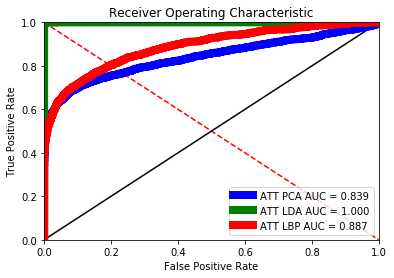

CAL PCA Equal error rate: 0.275
CAL LDA Equal error rate: 0.020
CAL LBP Equal error rate: 0.223


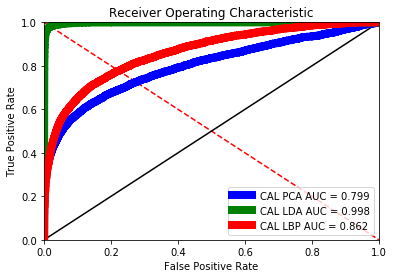

LFW PCA Equal error rate: 0.402
LFW LDA Equal error rate: 0.003
LFW LBP Equal error rate: 0.347


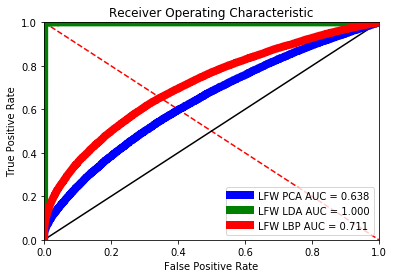

In [20]:
[EER_att_PCA, EER_att_LDA, EER_att_LBP] = show_roc([scores_att_PCA, scores_att_LDA, scores_att_LBP], \
                       [identical_att_PCA, identical_att_LDA, identical_att_LBP], \
                                                  ['ATT PCA', 'ATT LDA', 'ATT LBP'])

[EER_cal_PCA, EER_cal_LDA, EER_cal_LBP] = show_roc([scores_cal_PCA, scores_cal_LDA, scores_cal_LBP], \
                       [identical_cal_PCA, identical_cal_LDA, identical_cal_LBP], \
                                                  ['CAL PCA', 'CAL LDA', 'CAL LBP'])

[EER_lfw_PCA, EER_lfw_LDA, EER_lfw_LBP] = show_roc([scores_lfw_PCA, scores_lfw_LDA, scores_lfw_LBP], \
                       [identical_lfw_PCA, identical_lfw_LDA, identical_lfw_LBP], \
                                                  ['LFW PCA', 'LFW LDA', 'LFW LBP'])

We can see that for each face DB, the best performing method is LDA, the worst performing one in PCA.

ATT PCA Equal error rate: 0.235
CAL PCA Equal error rate: 0.275
LFW PCA Equal error rate: 0.402


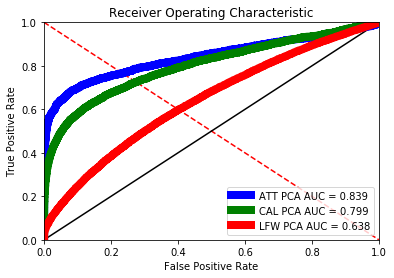

ATT LDA Equal error rate: 0.003
CAL LDA Equal error rate: 0.020
LFW LDA Equal error rate: 0.003


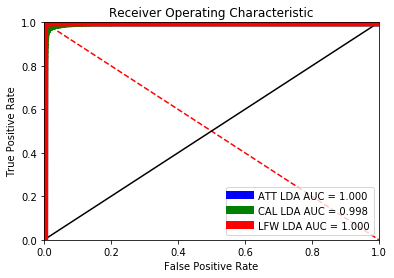

ATT LBP Equal error rate: 0.197
CAL LBP Equal error rate: 0.223
LFW LBP Equal error rate: 0.347


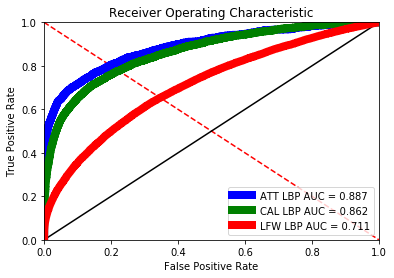

In [21]:
[EER_att_PCA, EER_cal_PCA, EER_lfw_PCA] = show_roc([scores_att_PCA, scores_cal_PCA, scores_lfw_PCA], \
                       [identical_att_PCA, identical_cal_PCA, identical_lfw_PCA], \
                                                  ['ATT PCA', 'CAL PCA', 'LFW PCA'])

[EER_att_LDA, EER_cal_LDA, EER_lfw_LDA] = show_roc([scores_att_LDA, scores_cal_LDA, scores_lfw_LDA], \
                       [identical_att_LDA, identical_cal_LDA, identical_lfw_LDA], \
                                                  ['ATT LDA', 'CAL LDA', 'LFW LDA'])

[EER_att_LBP, EER_cal_LBP, EER_lfw_LBP] = show_roc([scores_att_LBP, scores_cal_LBP, scores_lfw_LBP], \
                       [identical_att_LBP, identical_cal_LBP, identical_lfw_LBP], \
                                                  ['ATT LBP', 'CAL LBP', 'LFW LBP'])

All methods have best performance on the least complex DB: ATT and as the DB complexity increases, the performance gets worse.

#### Caluclate classification scores
* plot precision-recall curve
* calculate AUC
* average precision
* others?

In [41]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

def show_precision_recall(scores_arr, identical_arr, opt_tau_arr, names):
    colors = ['b','g','r']
    for i in range(len(scores_arr)):
        precision, recall, thresholds = precision_recall_curve(identical_arr[i], scores_arr[i])
        scores_th = np.where(scores_arr[i] > opt_tau_arr[i], 1, 0)
        f1 = f1_score(identical_arr[i], scores_th)

        auc_ = auc(recall, precision)

        ap = average_precision_score(identical_arr[i], scores_arr[i])
        print('%s f1=%.3f auc=%.3f ap=%.3f' % (names[i], f1, auc_, ap))
        plt.plot(recall, precision, colors[i], marker='.',linewidth=3, label = '%s AUC = %0.3f' % (names[i], auc_))
    plt.legend(loc = 'lower left')
    plt.xlabel('recall', fontsize=16)
    plt.ylabel('precision', fontsize=16)
    plt.plot([0, 1], [0.5, 0.5], 'k--') 
    plt.show()

ATT PCA f1=0.574 auc=0.572 ap=0.573
ATT LDA f1=0.986 auc=0.999 ap=0.999
ATT LBP f1=0.571 auc=0.601 ap=0.601


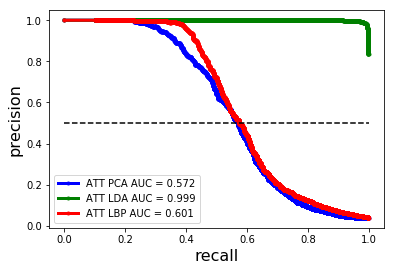

CAL PCA f1=0.454 auc=0.457 ap=0.457
CAL LDA f1=0.949 auc=0.981 ap=0.981
CAL LBP f1=0.496 auc=0.530 ap=0.530


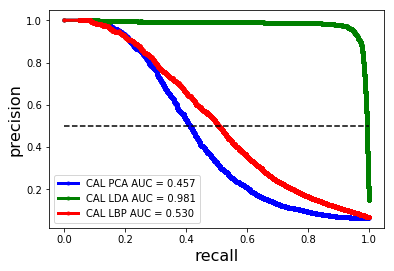

LFW PCA f1=0.140 auc=0.116 ap=0.116
LFW LDA f1=0.941 auc=0.986 ap=0.986
LFW LBP f1=0.183 auc=0.155 ap=0.155


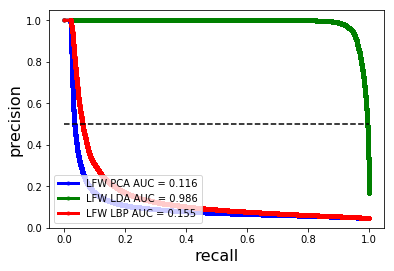

In [42]:
show_precision_recall([scores_att_PCA, scores_att_LDA, scores_att_LBP], 
                      [identical_att_PCA, identical_att_LDA, identical_att_LBP],
                      [opt_tau_att_PCA, opt_tau_att_LDA, opt_tau_att_LBP],
                      ['ATT PCA', 'ATT LDA', 'ATT LBP'])

show_precision_recall([scores_cal_PCA, scores_cal_LDA, scores_cal_LBP], 
                      [identical_cal_PCA, identical_cal_LDA, identical_cal_LBP],
                      [opt_tau_cal_PCA, opt_tau_cal_LDA, opt_tau_cal_LBP],
                      ['CAL PCA', 'CAL LDA', 'CAL LBP'])

show_precision_recall([scores_lfw_PCA, scores_lfw_LDA, scores_lfw_LBP], 
                      [identical_lfw_PCA, identical_lfw_LDA, identical_lfw_LBP],
                      [opt_tau_lfw_PCA, opt_tau_lfw_LDA, opt_tau_lfw_LBP],
                      ['LFW PCA', 'LFW LDA', 'LFW LBP'])

ATT PCA f1=0.572 auc=0.596 ap=0.596
CAL PCA f1=0.427 auc=0.459 ap=0.459
LFW PCA f1=0.102 auc=0.109 ap=0.109


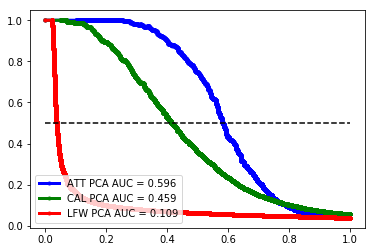

ATT LDA f1=0.370 auc=0.999 ap=0.999
CAL LDA f1=0.624 auc=0.979 ap=0.979
LFW LDA f1=0.326 auc=0.999 ap=0.999


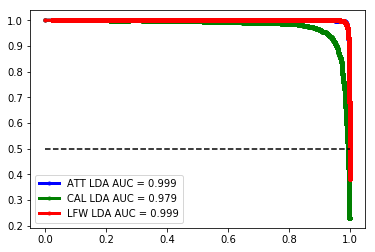

ATT LBP f1=0.208 auc=0.604 ap=0.605
CAL LBP f1=0.162 auc=0.485 ap=0.485
LFW LBP f1=0.099 auc=0.177 ap=0.177


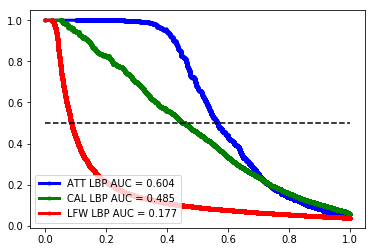

In [24]:
show_precision_recall([scores_att_PCA, scores_cal_PCA, scores_lfw_PCA], 
                      [identical_att_PCA, identical_cal_PCA, identical_lfw_PCA],
                      [opt_tau_att_PCA, opt_tau_cal_PCA, opt_tau_lfw_PCA],
                      ['ATT PCA', 'CAL PCA', 'LFW PCA'])

show_precision_recall([scores_att_LDA, scores_cal_LDA, scores_lfw_LDA], 
                      [identical_att_LDA, identical_cal_LDA, identical_lfw_LDA],
                      [opt_tau_att_LDA, opt_tau_cal_LDA, opt_tau_lfw_LDA],
                      ['ATT LDA', 'CAL LDA', 'LFW LDA'])

show_precision_recall([scores_att_LBP, scores_cal_LBP, scores_lfw_LBP], 
                      [identical_att_LBP, identical_cal_LBP, identical_lfw_LBP],
                      [opt_tau_att_LBP, opt_tau_cal_LBP, opt_tau_lfw_LBP],
                      ['ATT LBP', 'CAL LBP', 'LFW LBP'])

## Classification secenario

Biometrics classification is based on generating pairwise mathcing scores. 
* In verification mode one compares this matching score to a decision threshold in a 1-to-1 classification setting.
* In identifcation mode one usese this matching score to rank the templates in the database and, possibly, thresholding it as well in a 1-to-N classification setting

Hence, a simple pairwise comparision (L2-distance, e.g.) can be used. 

Generate a Cumulative Matching Curve

In [43]:
from CMC import CMC

In [44]:
def get_ranks(rank, n_samples, y, DESC, embedded):

    indexes = []

    for i in range(n_samples):
        true_label = y[i]
        dist = []
        labels_ind = []
        for j in range(n_samples):
            if i != j:

                if DESC == "LBP":

                    dist.append(CHI2(embedded[i], embedded[j]))

                else:
                    dist.append(L2_distance(embedded[i], embedded[j]))

                labels_ind.append(y[j])


        s = [x for _, x in sorted(zip(dist, labels_ind))]
        index = s.index(true_label)
        indexes.append(index+1)

    ranks = []
    c = 0
    for i in range(1,rank+1):
        c += indexes.count(i)
        ranks.append(c/len(indexes))

    return ranks


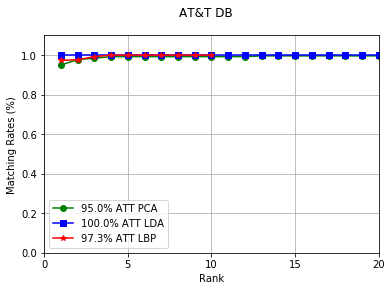

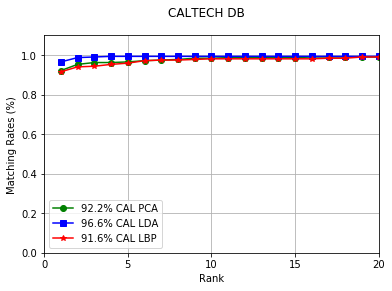

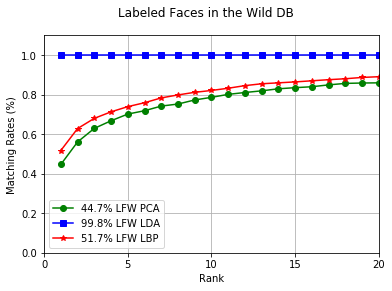

In [47]:
ranks_att_PCA = get_ranks(20, n_samples_att, y_att, 'PCA', embedded_att_PCA)
ranks_att_LDA = get_ranks(20, n_samples_att, y_att, 'LDA', embedded_att_LDA)
ranks_att_LBP = get_ranks(10, n_samples_att, y_att, 'LBP', embedded_att_LBP)

ranks_cal_PCA = get_ranks(20, n_samples_cal, y_cal, 'PCA', embedded_cal_PCA)
ranks_cal_LDA = get_ranks(20, n_samples_cal, y_cal, 'LDA', embedded_cal_LDA)
ranks_cal_LBP = get_ranks(20, n_samples_cal, y_cal, 'LBP', embedded_cal_LBP)

ranks_lfw_PCA = get_ranks(20, n_samples_lfw, y_lfw, 'PCA', embedded_lfw_PCA)
ranks_lfw_LDA = get_ranks(20, n_samples_lfw, y_lfw, 'LDA', embedded_lfw_LDA)
ranks_lfw_LBP = get_ranks(20, n_samples_lfw, y_lfw, 'LBP', embedded_lfw_LBP)

cmc_dict ={'ATT PCA': ranks_att_PCA,
          'ATT LDA': ranks_att_LDA,
          'ATT LBP': ranks_att_LBP}
cmc = CMC(cmc_dict)
cmc.plot(title='AT&T DB')

cmc_dict ={'CAL PCA': ranks_cal_PCA,
          'CAL LDA': ranks_cal_LDA,
          'CAL LBP': ranks_cal_LBP}
cmc = CMC(cmc_dict)
cmc.plot(title='CALTECH DB')

cmc_dict ={'LFW PCA': ranks_lfw_PCA,
          'LFW LDA': ranks_lfw_LDA,
          'LFW LBP': ranks_lfw_LBP}
cmc = CMC(cmc_dict)
cmc.plot(title='Labeled Faces in the Wild DB')

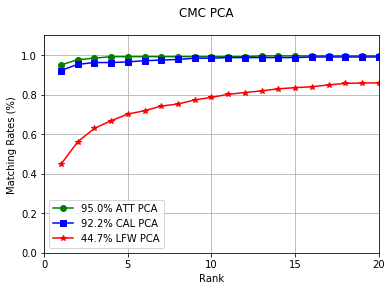

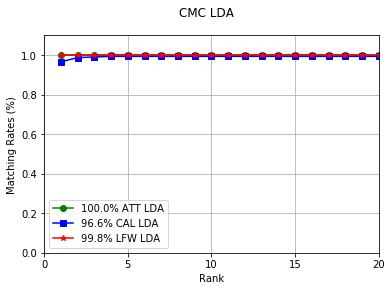

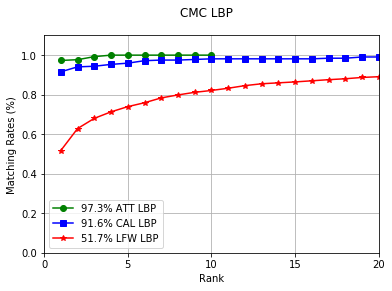

In [48]:
cmc_dict ={'ATT PCA': ranks_att_PCA,
          'CAL PCA': ranks_cal_PCA,
          'LFW PCA': ranks_lfw_PCA}
cmc = CMC(cmc_dict)
cmc.plot(title='CMC PCA')

cmc_dict ={'ATT LDA': ranks_att_LDA,
          'CAL LDA': ranks_cal_LDA,
          'LFW LDA': ranks_lfw_LDA}
cmc = CMC(cmc_dict)
cmc.plot(title='CMC LDA')

cmc_dict ={'ATT LBP': ranks_att_LBP,
          'CAL LBP': ranks_cal_LBP,
          'LFW LBP': ranks_lfw_LBP}
cmc = CMC(cmc_dict)
cmc.plot(title='CMC LBP')

In a more general classification scenario one can use the feature representations to build more complex classifiers (SVM, NN, etc.). Testing then requires a splitting in training and validation subsets. 

Here you find an example with KNN and SVM as classifiers and their validation results. 

In [49]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

In [50]:
def calc_KNN_SVM(y, embedded, name):

    targets = y

    encoder = LabelEncoder()
    encoder.fit(targets)

    # Numerical encoding of identities
    y_enc = encoder.transform(targets)

    X_train, X_test, y_train, y_test = train_test_split(embedded, y_enc, test_size=0.25, random_state=42)

    knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
    knn.fit(X_train, y_train)

    svc = LinearSVC()
    param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
                  'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
    svc = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), 
                       param_grid, cv=5)
    svc.fit(X_train, y_train)

    acc_knn = accuracy_score(y_test, knn.predict(X_test))
#     print(y_test)
#     print(knn.predict(X_test))
    acc_svc = accuracy_score(y_test, svc.predict(X_test))

    print('%s: KNN accuracy = %.2f, SVM accuracy = %.2f' % (name, acc_knn, acc_svc))

In [51]:
import warnings
warnings.filterwarnings('ignore')

In [52]:
calc_KNN_SVM(y_att, embedded_att_PCA, 'ATT PCA')
calc_KNN_SVM(y_att, embedded_att_LDA, 'ATT LDA')
calc_KNN_SVM(y_att, embedded_att_LBP, 'ATT LBP')

calc_KNN_SVM(y_cal, embedded_cal_PCA, 'CAL PCA')
calc_KNN_SVM(y_cal, embedded_cal_LDA, 'CAL LDA')
calc_KNN_SVM(y_cal, embedded_cal_LBP, 'CAL LBP')

calc_KNN_SVM(y_lfw, embedded_lfw_PCA, 'LFW PCA')
calc_KNN_SVM(y_lfw, embedded_lfw_LDA, 'LFW LDA')
calc_KNN_SVM(y_lfw, embedded_lfw_LBP, 'LFW LBP')

ATT PCA: KNN accuracy = 0.94, SVM accuracy = 0.98
ATT LDA: KNN accuracy = 1.00, SVM accuracy = 1.00
ATT LBP: KNN accuracy = 0.95, SVM accuracy = 0.97
CAL PCA: KNN accuracy = 0.91, SVM accuracy = 0.96
CAL LDA: KNN accuracy = 0.97, SVM accuracy = 0.99
CAL LBP: KNN accuracy = 0.86, SVM accuracy = 0.93
LFW PCA: KNN accuracy = 0.45, SVM accuracy = 0.56
LFW LDA: KNN accuracy = 1.00, SVM accuracy = 1.00
LFW LBP: KNN accuracy = 0.46, SVM accuracy = 0.51
